In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
import missingno
import scipy.stats as st
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.interpolate import UnivariateSpline

- I_SO2_1H          SO2分指数
- C_NO2_1H	        NO2浓度
- I_NO2_1H	        NO2分指数
- C_PM10_1H	        PM10浓度
- C_PM10_24H_MV	     PM10 24小时滑动平均浓度
- I_PM10_24H_MV	     PM10 24小时滑动平均分指数
- C_CO1_1H	       CO小时浓度
- I_CO1_1H	       CO分指数
- C_O3_1H	          O3小时浓度
- I_O3_1H	O3         分指数
- C_O3_8H_MV	       O3 8小时滑动平均浓度
- I_O3_8H_MV	       O3 8小时滑动平均分指数
- I_O3_8H_MV	       PM25 小时浓度
- C_PM25_24H_MV	    PM25 24 小时滑动平均浓度
- I_PM25_24H_MV	    PM25 24 小时滑动平均分指数
- AQI_	         AQI 指数
- PRIMARY_POLLUTANTS_	首要污染物
- LEVEL_	         污染级别
- CATEGORY_	      污染物种类
- COLOR_	         污染级别颜色标记
- STATE_	         状态
- SOURCE_	         污染源
- UPDATE_TIME_	   数据更新时间


In [2]:
dashi=pd.read_csv(r"F:\10个数据挖掘项目\空气质量预测-0527\train\train_大石西路.csv")
jinquan=pd.read_csv(r"F:\10个数据挖掘项目\空气质量预测-0527\train\train_金泉两河.csv")
junping=pd.read_csv(r"F:\10个数据挖掘项目\空气质量预测-0527\train\train_君平街.csv")
lingyan=pd.read_csv(r"F:\10个数据挖掘项目\空气质量预测-0527\train\train_灵岩寺.csv")
longquan=pd.read_csv(r"F:\10个数据挖掘项目\空气质量预测-0527\train\train_龙泉驿区政府.csv")
sanwayao=pd.read_csv(r"F:\10个数据挖掘项目\空气质量预测-0527\train\train_三瓦窑.csv")
shahepu=pd.read_csv(r"F:\10个数据挖掘项目\空气质量预测-0527\train\train_沙河铺.csv")
shilidian=pd.read_csv(r"F:\10个数据挖掘项目\空气质量预测-0527\train\train_十里店.csv")

In [3]:
train_data = pd.concat([dashi,jinquan,junping,lingyan,longquan,sanwayao,shahepu,shilidian],axis=0)

In [4]:
train_data.head().append(train_data.tail())

,MN_,DATA_TIME_,C_SO2_1H,I_SO2_1H,C_NO2_1H,I_NO2_1H,C_PM10_1H,C_PM10_24H_MV,I_PM10_24H_MV,C_CO1_1H,...,C_PM25_24H_MV,I_PM25_24H_MV,AQI_,PRIMARY_POLLUTANTS_,LEVEL_,CATEGORY_,COLOR_,STATE_,SOURCE_,UPDATE_TIME_
0,51010501002,2017/1/1 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,正常,NaN,2017/1/1 02:15:00
1,51010501002,2017/1/1 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,正常,NaN,2017/1/1 03:15:00
2,51010501002,2017/1/1 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,正常,NaN,2017/1/1 04:15:00
3,51010501002,2017/1/1 04:00:00,20.0,7.0,81.0,41.0,302.0,NaN,176.0,1.174,...,NaN,195.0,195.0,PM2.5,四级,中度污染,红色,正常,NaN,2017/1/1 05:15:00
4,51010501002,2017/1/1 05:00:00,31.0,11.0,78.0,39.0,289.0,NaN,170.0,1.028,...,NaN,189.0,189.0,PM2.5,四级,中度污染,红色,正常,NaN,2017/1/1 06:15:00
8376,51010801001,2017/12/24 19:00:00,11.0,4.0,92.0,46.0,228.0,NaN,139.0,1.621,...,NaN,232.0,232.0,PM2.5,五级,重度污染,紫色,正常,NaN,2017/12/24 19:40:00
8377,51010801001,2017/12/24 20:00:00,11.0,4.0,100.0,50.0,220.0,NaN,135.0,1.625,...,NaN,226.0,226.0,PM2.5,五级,重度污染,紫色,正常,NaN,2017/12/24 20:20:00
8378,51010801001,2017/12/24 21:00:00,11.0,4.0,107.0,54.0,216.0,NaN,133.0,1.540,...,NaN,221.0,221.0,PM2.5,五级,重度污染,紫色,正常,NaN,2017/12/24 21:20:00
8379,51010801001,2017/12/24 22:00:00,11.0,4.0,100.0,50.0,212.0,NaN,131.0,1.509,...,NaN,218.0,218.0,PM2.5,五级,重度污染,紫色,正常,NaN,2017/12/24 23:00:00
8380,51010801001,2017/12/24 23:00:00,11.0,4.0,145.0,73.0,230.0,NaN,140.0,1.957,...,NaN,228.0,228.0,PM2.5,五级,重度污染,紫色,正常,NaN,2017/12/24 23:20:00


In [5]:
train_data.shape

(59974, 26)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59974 entries, 0 to 8380
Data columns (total 26 columns):
MN_                    59974 non-null int64
DATA_TIME_             59974 non-null object
C_SO2_1H               54053 non-null float64
I_SO2_1H               54011 non-null float64
C_NO2_1H               56883 non-null float64
I_NO2_1H               56841 non-null float64
C_PM10_1H              56068 non-null float64
C_PM10_24H_MV          0 non-null float64
I_PM10_24H_MV          56026 non-null float64
C_CO1_1H               56926 non-null float64
I_CO1_1H               56884 non-null float64
C_O3_1H                52302 non-null float64
I_O3_1H                52260 non-null float64
C_O3_8H_MV             0 non-null float64
I_O3_8H_MV             0 non-null float64
C_PM25_1H              56641 non-null float64
C_PM25_24H_MV          0 non-null float64
I_PM25_24H_MV          56599 non-null float64
AQI_                   57215 non-null float64
PRIMARY_POLLUTANTS_    57215 non-null

In [7]:
train_data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
MN_,59974.0,5.101056e+10,259928.049471,5.101010e+10,5.101010e+10,5.101010e+10,5.101040e+10,5.101050e+10,5.101080e+10,5.101090e+10,5.101120e+10,5.101120e+10
C_SO2_1H,54053.0,1.124543e+01,7.319583,1.000000e+00,2.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01,1.300000e+01,1.800000e+01,3.500000e+01,3.620000e+02
I_SO2_1H,54011.0,4.083390e+00,2.358416,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.200000e+01,8.100000e+01
C_NO2_1H,56883.0,4.827706e+01,28.255826,1.000000e+00,6.000000e+00,1.600000e+01,2.600000e+01,4.400000e+01,6.500000e+01,8.600000e+01,1.320000e+02,2.440000e+02
I_NO2_1H,56841.0,2.438191e+01,14.123059,1.000000e+00,3.000000e+00,8.000000e+00,1.300000e+01,2.200000e+01,3.300000e+01,4.300000e+01,6.600000e+01,1.050000e+02
C_PM10_1H,56068.0,8.308581e+01,70.672152,1.000000e+00,8.000000e+00,2.200000e+01,3.700000e+01,6.300000e+01,1.070000e+02,1.680000e+02,3.560000e+02,8.080000e+02
C_PM10_24H_MV,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I_PM10_24H_MV,56026.0,6.369903e+01,43.421962,1.000000e+00,8.000000e+00,2.200000e+01,3.700000e+01,5.700000e+01,7.900000e+01,1.090000e+02,2.090000e+02,5.000000e+02
C_CO1_1H,56926.0,8.583510e-01,0.469247,-2.100000e-01,9.900000e-02,3.950000e-01,5.780000e-01,7.850000e-01,1.035000e+00,1.394000e+00,2.503000e+00,2.417900e+01
I_CO1_1H,56884.0,9.076278e+00,4.607160,0.000000e+00,1.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,1.100000e+01,1.400000e+01,2.600000e+01,1.290000e+02


In [8]:
train_data.isnull().mean().sort_values(ascending=False)

I_O3_8H_MV             1.000000
C_PM25_24H_MV          1.000000
C_PM10_24H_MV          1.000000
SOURCE_                1.000000
C_O3_8H_MV             1.000000
I_O3_1H                0.128622
C_O3_1H                0.127922
I_SO2_1H               0.099426
C_SO2_1H               0.098726
I_PM10_24H_MV          0.065829
C_PM10_1H              0.065128
I_PM25_24H_MV          0.056274
C_PM25_1H              0.055574
I_NO2_1H               0.052239
C_NO2_1H               0.051539
I_CO1_1H               0.051522
C_CO1_1H               0.050822
LEVEL_                 0.046003
CATEGORY_              0.046003
COLOR_                 0.046003
AQI_                   0.046003
PRIMARY_POLLUTANTS_    0.046003
DATA_TIME_             0.000000
UPDATE_TIME_           0.000000
STATE_                 0.000000
MN_                    0.000000
dtype: float64

In [9]:
#查看缺失值函数
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(train_data)

Your selected dataframe has 26 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values
C_O3_8H_MV,59974,100.0
C_PM10_24H_MV,59974,100.0
C_PM25_24H_MV,59974,100.0
I_O3_8H_MV,59974,100.0
SOURCE_,59974,100.0
I_O3_1H,7714,12.9
C_O3_1H,7672,12.8
I_SO2_1H,5963,9.9
C_SO2_1H,5921,9.9
I_PM10_24H_MV,3948,6.6


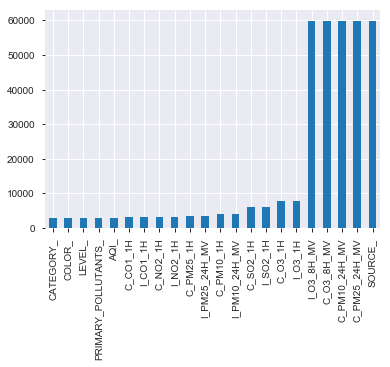

In [11]:
#对缺失值进行可视化
missing=train_data.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

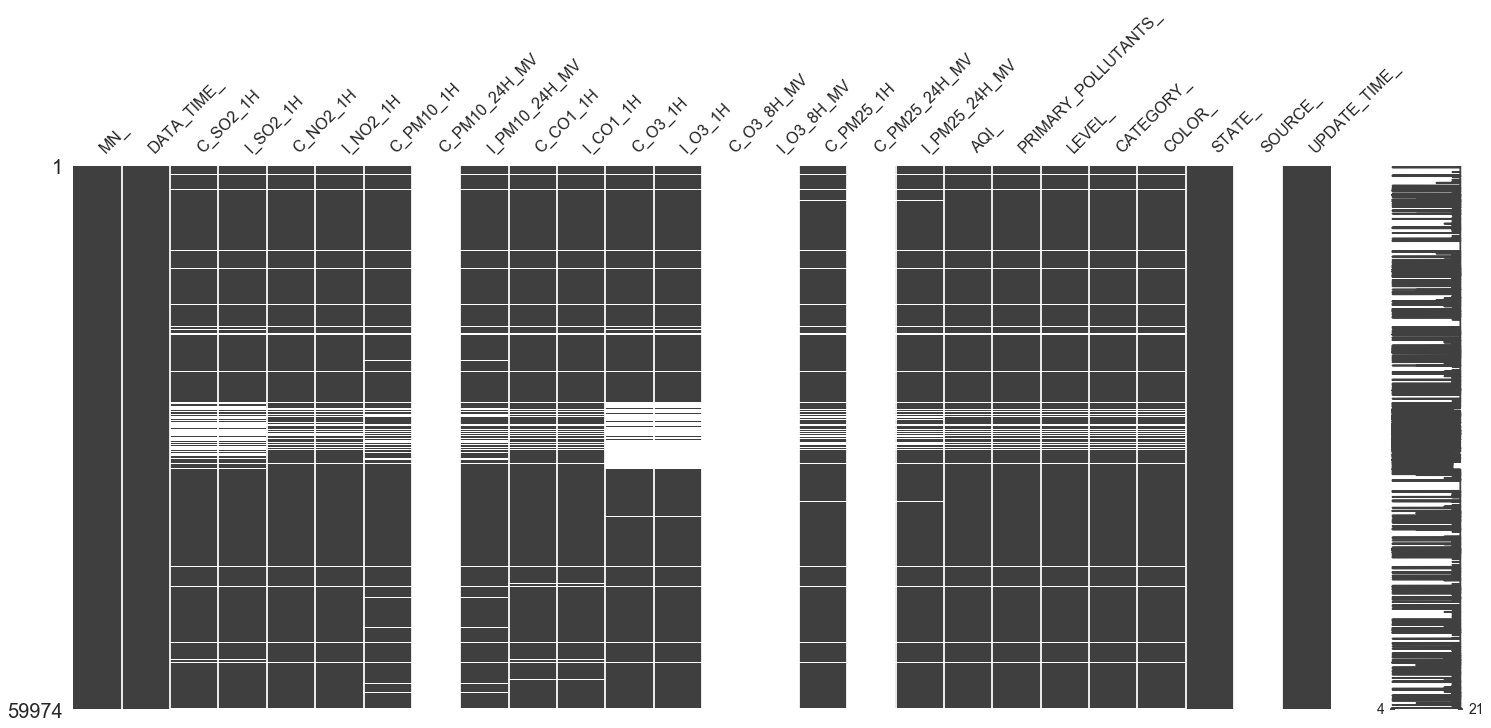

In [12]:
missingno.matrix(train_data)

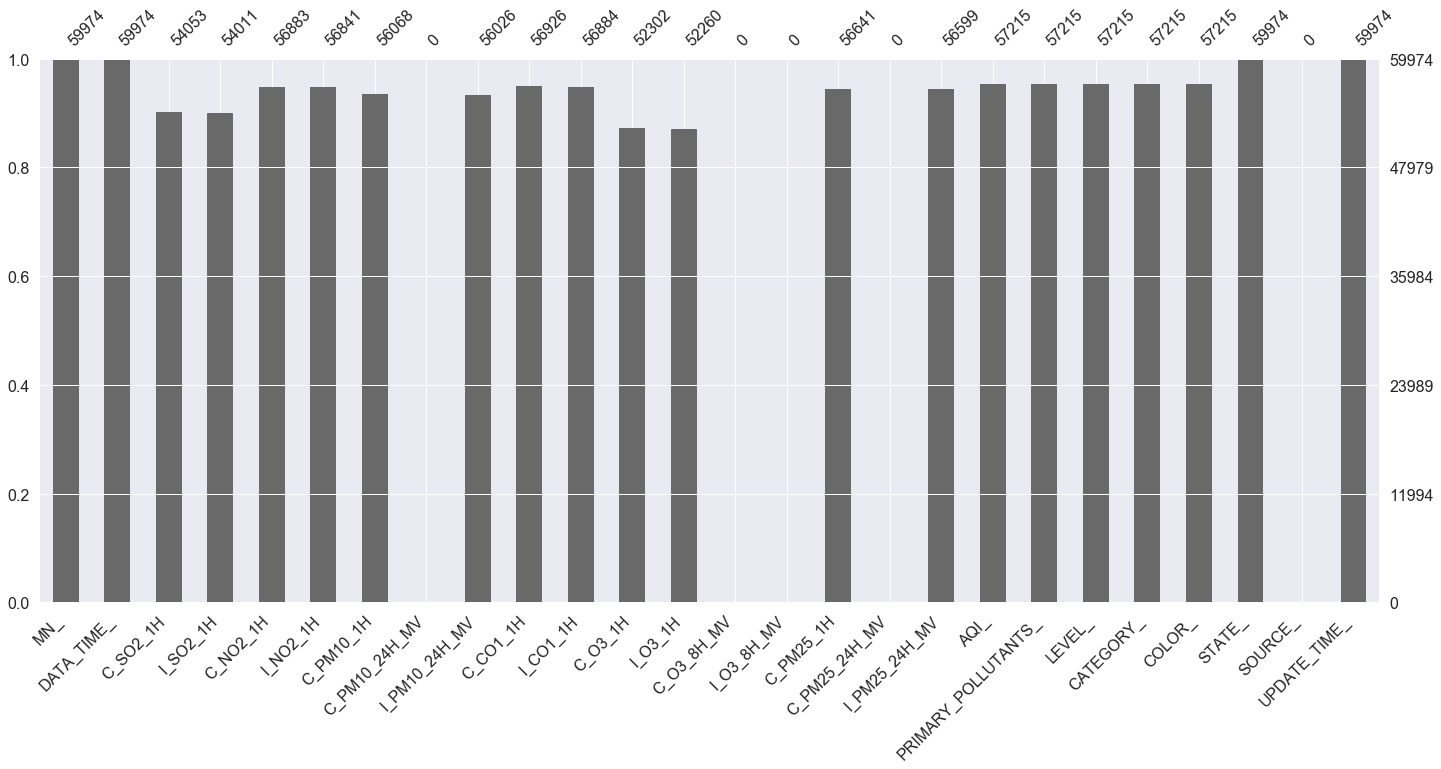

In [13]:
missingno.bar(train_data)

从上面缺失值来看，C_O3_8H_MV，C_PM10_24H_MV，C_PM25_24H_MV，I_O3_8H_MV，SOURCE_完全缺失，可以直接删除。其余缺失值均小于13%，可以尝试用算法填充或者后面我们用的XGB,LGB不需要对缺失值进行填充

In [14]:
#删除掉完全缺失的特征
del train_data['C_O3_8H_MV']
del train_data['C_PM10_24H_MV']
del train_data['C_PM25_24H_MV']
del train_data['I_O3_8H_MV']
del train_data['SOURCE_']

In [15]:
train_data.columns

Index(['MN_', 'DATA_TIME_', 'C_SO2_1H', 'I_SO2_1H', 'C_NO2_1H', 'I_NO2_1H',
       'C_PM10_1H', 'I_PM10_24H_MV', 'C_CO1_1H', 'I_CO1_1H', 'C_O3_1H',
       'I_O3_1H', 'C_PM25_1H', 'I_PM25_24H_MV', 'AQI_', 'PRIMARY_POLLUTANTS_',
       'LEVEL_', 'CATEGORY_', 'COLOR_', 'STATE_', 'UPDATE_TIME_'],
      dtype='object')

In [16]:
for i in train_data.columns:
    print(train_data[i].value_counts())

51010801001    8381
51010901001    8380
51010501001    8380
51010501002    8380
51010101001    8380
51010401001    8379
51010601002    8377
51011201004    1317
Name: MN_, dtype: int64
2017/11/12 14:00:00    8
2017/11/29 04:00:00    8
2017/12/4 07:00:00     8
2017/11/16 10:00:00    8
2017/11/7 05:00:00     8
                      ..
2017/12/11 14:00:00    6
2017/12/13 00:00:00    6
2017/12/11 02:00:00    6
2017/12/24 00:00:00    6
2017/12/18 05:00:00    5
Name: DATA_TIME_, Length: 8383, dtype: int64
8.0      5625
10.0     5461
9.0      5251
11.0     4606
7.0      4320
         ... 
362.0       1
98.0        1
180.0       1
229.0       1
63.0        1
Name: C_SO2_1H, Length: 92, dtype: int64
3.0     15178
4.0     13612
2.0      7166
5.0      6659
6.0      3640
1.0      2351
7.0      2011
8.0      1205
9.0       723
10.0      479
11.0      298
12.0      228
13.0      149
14.0      111
15.0       62
16.0       39
17.0       27
18.0       22
19.0        8
21.0        6
20.0        6
57.0   

In [17]:
train_data.DATA_TIME_.value_counts()

2017/11/12 14:00:00    8
2017/11/29 04:00:00    8
2017/12/4 07:00:00     8
2017/11/16 10:00:00    8
2017/11/7 05:00:00     8
                      ..
2017/12/11 14:00:00    6
2017/12/13 00:00:00    6
2017/12/11 02:00:00    6
2017/12/24 00:00:00    6
2017/12/18 05:00:00    5
Name: DATA_TIME_, Length: 8383, dtype: int64

In [18]:
train_data.C_SO2_1H.value_counts()

8.0      5625
10.0     5461
9.0      5251
11.0     4606
7.0      4320
         ... 
362.0       1
98.0        1
180.0       1
229.0       1
63.0        1
Name: C_SO2_1H, Length: 92, dtype: int64

In [19]:
train_data.I_SO2_1H.value_counts()

3.0     15178
4.0     13612
2.0      7166
5.0      6659
6.0      3640
1.0      2351
7.0      2011
8.0      1205
9.0       723
10.0      479
11.0      298
12.0      228
13.0      149
14.0      111
15.0       62
16.0       39
17.0       27
18.0       22
19.0        8
21.0        6
20.0        6
57.0        4
27.0        3
22.0        3
55.0        2
24.0        2
53.0        2
60.0        2
54.0        2
81.0        1
39.0        1
29.0        1
61.0        1
56.0        1
33.0        1
58.0        1
62.0        1
59.0        1
26.0        1
51.0        1
Name: I_SO2_1H, dtype: int64

In [20]:
train_data.C_NO2_1H.value_counts()

24.0     933
38.0     922
26.0     913
27.0     873
22.0     864
        ... 
239.0      1
184.0      1
186.0      1
185.0      1
180.0      1
Name: C_NO2_1H, Length: 204, dtype: int64

In [21]:
train_data.I_NO2_1H.value_counts()

12.0     1773
19.0     1730
14.0     1724
13.0     1699
15.0     1686
         ... 
98.0        1
104.0       1
105.0       1
90.0        1
95.0        1
Name: I_NO2_1H, Length: 104, dtype: int64

In [22]:
train_data.C_PM10_1H.value_counts()

38.0     652
36.0     647
32.0     636
39.0     631
34.0     629
        ... 
460.0      1
663.0      1
462.0      1
514.0      1
520.0      1
Name: C_PM10_1H, Length: 574, dtype: int64

In [23]:
train_data.I_PM10_24H_MV.value_counts()

51.0     1079
52.0     1048
53.0      981
54.0      929
57.0      904
         ... 
357.0       1
367.0       1
421.0       1
437.0       1
395.0       1
Name: I_PM10_24H_MV, Length: 398, dtype: int64

In [24]:
train_data.C_CO1_1H.value_counts()

0.770    97
0.716    96
0.616    90
0.700    90
0.676    89
         ..
2.254     1
2.850     1
2.644     1
2.977     1
2.924     1
Name: C_CO1_1H, Length: 2857, dtype: int64

In [25]:
train_data.I_CO1_1H.value_counts()

8.0      6981
7.0      6829
9.0      6484
6.0      5881
10.0     5230
5.0      3959
11.0     3775
12.0     2777
4.0      2425
13.0     2009
3.0      1586
14.0     1489
2.0      1274
15.0     1161
16.0      893
17.0      672
1.0       583
18.0      553
19.0      415
20.0      345
21.0      271
22.0      225
23.0      208
24.0      173
26.0      115
25.0      114
27.0       90
28.0       78
29.0       68
30.0       50
31.0       32
32.0       25
33.0       22
36.0       16
34.0       15
35.0       14
37.0        8
38.0        7
40.0        5
39.0        5
43.0        4
42.0        4
44.0        3
46.0        2
45.0        2
41.0        2
0.0         1
112.0       1
49.0        1
60.0        1
129.0       1
Name: I_CO1_1H, dtype: int64

In [26]:
train_data.C_O3_1H.value_counts()

2.0      2329
6.0      2123
5.0      1701
7.0      1483
8.0      1324
         ... 
307.0       1
272.0       1
302.0       1
358.0       1
296.0       1
Name: C_O3_1H, Length: 314, dtype: int64

In [27]:
train_data.I_O3_1H.value_counts()

2.0      4982
1.0      3964
3.0      3864
4.0      2232
5.0      2205
         ... 
161.0       1
147.0       1
151.0       1
179.0       1
150.0       1
Name: I_O3_1H, Length: 156, dtype: int64

In [28]:
train_data.C_PM25_1H.value_counts()

17.0     995
23.0     981
22.0     978
16.0     970
15.0     963
        ... 
365.0      1
339.0      1
340.0      1
437.0      1
314.0      1
Name: C_PM25_1H, Length: 372, dtype: int64

In [29]:
train_data.I_PM25_24H_MV.value_counts()

25.0     995
33.0     981
32.0     978
23.0     969
22.0     962
        ... 
388.0      1
426.0      1
460.0      1
431.0      1
433.0      1
Name: I_PM25_24H_MV, Length: 368, dtype: int64

In [30]:
#需要对数据进行区分，提取新特征
train_data.PRIMARY_POLLUTANTS_.value_counts()

PM2.5             23330
-                 20710
PM10              10335
O3-1小时             1987
PM10,PM2.5          566
NO2                 252
NO2,PM10             18
O3-1小时,PM2.5          7
PM10,O3-1小时           4
CO                    3
SO2                   1
NO2,PM2.5             1
NO2,PM10,PM2.5        1
Name: PRIMARY_POLLUTANTS_, dtype: int64

In [31]:
train_data.LEVEL_.value_counts()

二级    23423
一级    20710
三级     7794
四级     2642
五级     2153
六级      493
Name: LEVEL_, dtype: int64

In [32]:
train_data.CATEGORY_.value_counts()

良       23423
优       20710
轻度污染     7794
中度污染     2642
重度污染     2153
严重污染      493
Name: CATEGORY_, dtype: int64

In [33]:
train_data.COLOR_.value_counts()

黄色     23423
绿色     20710
橙色      7794
红色      2642
紫色      2153
褐红色      493
Name: COLOR_, dtype: int64

In [34]:
train_data.STATE_.value_counts()

正常    59974
Name: STATE_, dtype: int64

In [35]:
train_data.UPDATE_TIME_.value_counts()

2017/12/14 00:20:00    8
2017/11/2 15:00:00     8
2017/10/30 14:00:01    8
2017/11/23 01:45:03    8
2017/11/23 03:40:00    8
                      ..
2017/12/12 18:20:00    1
2017/12/21 00:40:00    1
2017/12/13 11:20:00    1
2017/12/12 13:20:00    1
2017/12/19 22:40:00    1
Name: UPDATE_TIME_, Length: 8483, dtype: int64

In [36]:
#由于STATE_全部属于正常，严重偏态分布了，故删除
del train_data['STATE_']

In [37]:
train_data.head().append(train_data.tail())

,MN_,DATA_TIME_,C_SO2_1H,I_SO2_1H,C_NO2_1H,I_NO2_1H,C_PM10_1H,I_PM10_24H_MV,C_CO1_1H,I_CO1_1H,C_O3_1H,I_O3_1H,C_PM25_1H,I_PM25_24H_MV,AQI_,PRIMARY_POLLUTANTS_,LEVEL_,CATEGORY_,COLOR_,UPDATE_TIME_
0,51010501002,2017/1/1 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/1/1 02:15:00
1,51010501002,2017/1/1 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/1/1 03:15:00
2,51010501002,2017/1/1 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/1/1 04:15:00
3,51010501002,2017/1/1 04:00:00,20.0,7.0,81.0,41.0,302.0,176.0,1.174,12.0,3.0,1.0,146.0,195.0,195.0,PM2.5,四级,中度污染,红色,2017/1/1 05:15:00
4,51010501002,2017/1/1 05:00:00,31.0,11.0,78.0,39.0,289.0,170.0,1.028,11.0,3.0,1.0,142.0,189.0,189.0,PM2.5,四级,中度污染,红色,2017/1/1 06:15:00
8376,51010801001,2017/12/24 19:00:00,11.0,4.0,92.0,46.0,228.0,139.0,1.621,17.0,65.0,21.0,182.0,232.0,232.0,PM2.5,五级,重度污染,紫色,2017/12/24 19:40:00
8377,51010801001,2017/12/24 20:00:00,11.0,4.0,100.0,50.0,220.0,135.0,1.625,17.0,59.0,19.0,176.0,226.0,226.0,PM2.5,五级,重度污染,紫色,2017/12/24 20:20:00
8378,51010801001,2017/12/24 21:00:00,11.0,4.0,107.0,54.0,216.0,133.0,1.540,16.0,49.0,16.0,171.0,221.0,221.0,PM2.5,五级,重度污染,紫色,2017/12/24 21:20:00
8379,51010801001,2017/12/24 22:00:00,11.0,4.0,100.0,50.0,212.0,131.0,1.509,16.0,51.0,16.0,168.0,218.0,218.0,PM2.5,五级,重度污染,紫色,2017/12/24 23:00:00
8380,51010801001,2017/12/24 23:00:00,11.0,4.0,145.0,73.0,230.0,140.0,1.957,20.0,6.0,2.0,178.0,228.0,228.0,PM2.5,五级,重度污染,紫色,2017/12/24 23:20:00


In [38]:
train_data.shape

(59974, 20)

In [39]:
train_data.to_csv('train_data.csv')

了解预测值的数据分布

In [40]:
train_data.AQI_.value_counts()

52.0     954
53.0     865
55.0     823
57.0     822
54.0     787
        ... 
343.0      1
331.0      1
438.0      1
366.0      1
442.0      1
Name: AQI_, Length: 447, dtype: int64

In [41]:
train_data.AQI_.isnull().sum()

2759

AQI_ 里面还有缺失值，可以用缺失值周边的最近时间段来进行填充。

In [42]:
train_data.AQI_=train_data.AQI_.astype(float)

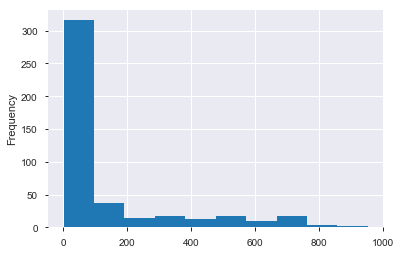

In [43]:
#画出预测值分布图
train_data[train_data.AQI_>0].AQI_.value_counts().plot.hist()

标签价格不服从整体分布，故在进行回归时需要对标签进行转换。

skewness:2.241632
kurtosis:7.566056


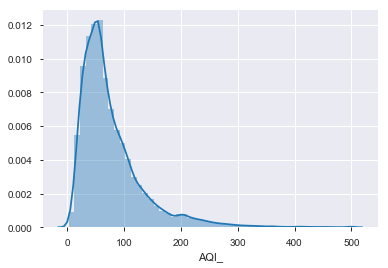

In [44]:
#查看AQI_的偏度与峰度
sns.distplot(train_data[train_data.AQI_>0].AQI_)
print('skewness:%f'%train_data.AQI_.skew())
print('kurtosis:%f'%train_data.AQI_.kurt())

In [45]:
train_data.skew(),train_data.kurt()

(MN_             -0.028185
 C_SO2_1H         8.745627
 I_SO2_1H         5.935460
 C_NO2_1H         0.947408
 I_NO2_1H         0.939032
 C_PM10_1H        2.442766
 I_PM10_24H_MV    3.178198
 C_CO1_1H         4.208852
 I_CO1_1H         2.115882
 C_O3_1H          1.484111
 I_O3_1H          2.744210
 C_PM25_1H        2.184720
 I_PM25_24H_MV    1.858670
 AQI_             2.241632
 dtype: float64, MN_               -0.292417
 C_SO2_1H         238.028997
 I_SO2_1H         110.034970
 C_NO2_1H           1.184584
 I_NO2_1H           1.115026
 C_PM10_1H          9.659962
 I_PM10_24H_MV     20.185100
 C_CO1_1H         128.400367
 I_CO1_1H          17.611065
 C_O3_1H            2.358316
 I_O3_1H           10.279508
 C_PM25_1H          6.781342
 I_PM25_24H_MV      4.457234
 AQI_               7.566056
 dtype: float64)

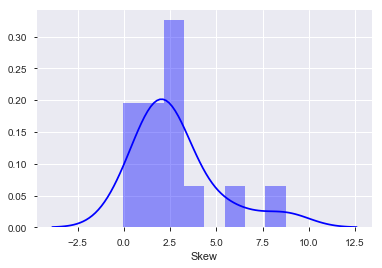

In [46]:
#画出train_data的峰度图
sns.distplot(train_data.skew(),color='blue',axlabel='Skew')

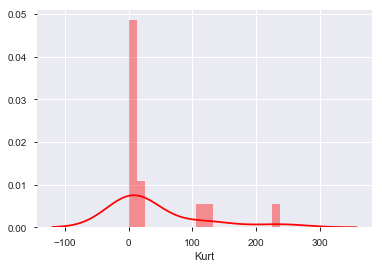

In [47]:
#画出train_data的偏度图
sns.distplot(train_data.kurt(),color='red',axlabel='Kurt')

(array([22398., 22132.,  7532.,  2556.,  1509.,   599.,   243.,   107.,
           76.,    63.]),
 array([  3. ,  52.7, 102.4, 152.1, 201.8, 251.5, 301.2, 350.9, 400.6,
        450.3, 500. ]),
 <a list of 10 Patch objects>)

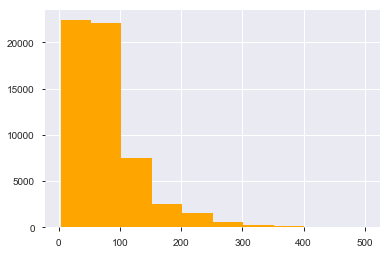

In [48]:
#查看预测值的最佳频数
plt.hist(train_data.AQI_,orientation='vertical',histtype='bar',color='orange')

查看频数, 大于400得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行

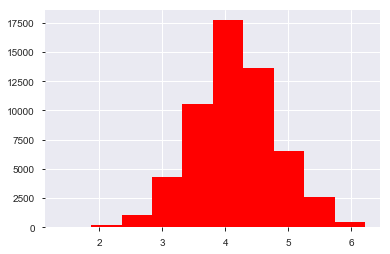

In [49]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测
plt.hist(np.log(train_data.AQI_+1),orientation='vertical',histtype='bar',color='red')
plt.show()

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59974 entries, 0 to 8380
Data columns (total 20 columns):
MN_                    59974 non-null int64
DATA_TIME_             59974 non-null object
C_SO2_1H               54053 non-null float64
I_SO2_1H               54011 non-null float64
C_NO2_1H               56883 non-null float64
I_NO2_1H               56841 non-null float64
C_PM10_1H              56068 non-null float64
I_PM10_24H_MV          56026 non-null float64
C_CO1_1H               56926 non-null float64
I_CO1_1H               56884 non-null float64
C_O3_1H                52302 non-null float64
I_O3_1H                52260 non-null float64
C_PM25_1H              56641 non-null float64
I_PM25_24H_MV          56599 non-null float64
AQI_                   57215 non-null float64
PRIMARY_POLLUTANTS_    57215 non-null object
LEVEL_                 57215 non-null object
CATEGORY_              57215 non-null object
COLOR_                 57215 non-null object
UPDATE_TIME_           59

In [51]:
# 数字特征
num_features = train_data.select_dtypes(include=[np.number])
print(num_features.columns)
# 类型特征
cate_features = train_data.select_dtypes(include=[np.object])
print(cate_features.columns)

Index(['MN_', 'C_SO2_1H', 'I_SO2_1H', 'C_NO2_1H', 'I_NO2_1H', 'C_PM10_1H',
       'I_PM10_24H_MV', 'C_CO1_1H', 'I_CO1_1H', 'C_O3_1H', 'I_O3_1H',
       'C_PM25_1H', 'I_PM25_24H_MV', 'AQI_'],
      dtype='object')
Index(['DATA_TIME_', 'PRIMARY_POLLUTANTS_', 'LEVEL_', 'CATEGORY_', 'COLOR_',
       'UPDATE_TIME_'],
      dtype='object')


In [52]:
#数字型特征
num_features=num_features.columns

In [53]:
num_features

Index(['MN_', 'C_SO2_1H', 'I_SO2_1H', 'C_NO2_1H', 'I_NO2_1H', 'C_PM10_1H',
       'I_PM10_24H_MV', 'C_CO1_1H', 'I_CO1_1H', 'C_O3_1H', 'I_O3_1H',
       'C_PM25_1H', 'I_PM25_24H_MV', 'AQI_'],
      dtype='object')

In [54]:
train_data.PRIMARY_POLLUTANTS_.value_counts()

PM2.5             23330
-                 20710
PM10              10335
O3-1小时             1987
PM10,PM2.5          566
NO2                 252
NO2,PM10             18
O3-1小时,PM2.5          7
PM10,O3-1小时           4
CO                    3
SO2                   1
NO2,PM2.5             1
NO2,PM10,PM2.5        1
Name: PRIMARY_POLLUTANTS_, dtype: int64

In [55]:
cate_features = [i for i in cate_features.columns if i not in ['DATA_TIME_','UPDATE_TIME_']]

In [57]:
#train_data特征的nunique分布
for i in cate_features:
    print(i +'的特征分布如下：')
    print('{}特征有{}不同值'.format(i,train_data[i].nunique()))
    print(train_data[i].value_counts())

PRIMARY_POLLUTANTS_的特征分布如下：
PRIMARY_POLLUTANTS_特征有13不同值
PM2.5             23330
-                 20710
PM10              10335
O3-1小时             1987
PM10,PM2.5          566
NO2                 252
NO2,PM10             18
O3-1小时,PM2.5          7
PM10,O3-1小时           4
CO                    3
SO2                   1
NO2,PM2.5             1
NO2,PM10,PM2.5        1
Name: PRIMARY_POLLUTANTS_, dtype: int64
LEVEL_的特征分布如下：
LEVEL_特征有6不同值
二级    23423
一级    20710
三级     7794
四级     2642
五级     2153
六级      493
Name: LEVEL_, dtype: int64
CATEGORY_的特征分布如下：
CATEGORY_特征有6不同值
良       23423
优       20710
轻度污染     7794
中度污染     2642
重度污染     2153
严重污染      493
Name: CATEGORY_, dtype: int64
COLOR_的特征分布如下：
COLOR_特征有6不同值
黄色     23423
绿色     20710
橙色      7794
红色      2642
紫色      2153
褐红色      493
Name: COLOR_, dtype: int64


数字特征分析

In [58]:
num_features

Index(['MN_', 'C_SO2_1H', 'I_SO2_1H', 'C_NO2_1H', 'I_NO2_1H', 'C_PM10_1H',
       'I_PM10_24H_MV', 'C_CO1_1H', 'I_CO1_1H', 'C_O3_1H', 'I_O3_1H',
       'C_PM25_1H', 'I_PM25_24H_MV', 'AQI_'],
      dtype='object')

In [59]:
#相关性分析
#计算数字型特征与标签AQI_的相关系数
train_data[num_features].corr()['AQI_'].sort_values(ascending=False)

AQI_             1.000000
C_PM25_1H        0.975618
I_PM25_24H_MV    0.972997
C_PM10_1H        0.959338
I_PM10_24H_MV    0.941732
I_CO1_1H         0.696750
C_CO1_1H         0.683957
I_NO2_1H         0.533876
C_NO2_1H         0.533810
I_SO2_1H         0.409164
C_SO2_1H         0.396497
MN_              0.133948
I_O3_1H         -0.133005
C_O3_1H         -0.199643
Name: AQI_, dtype: float64

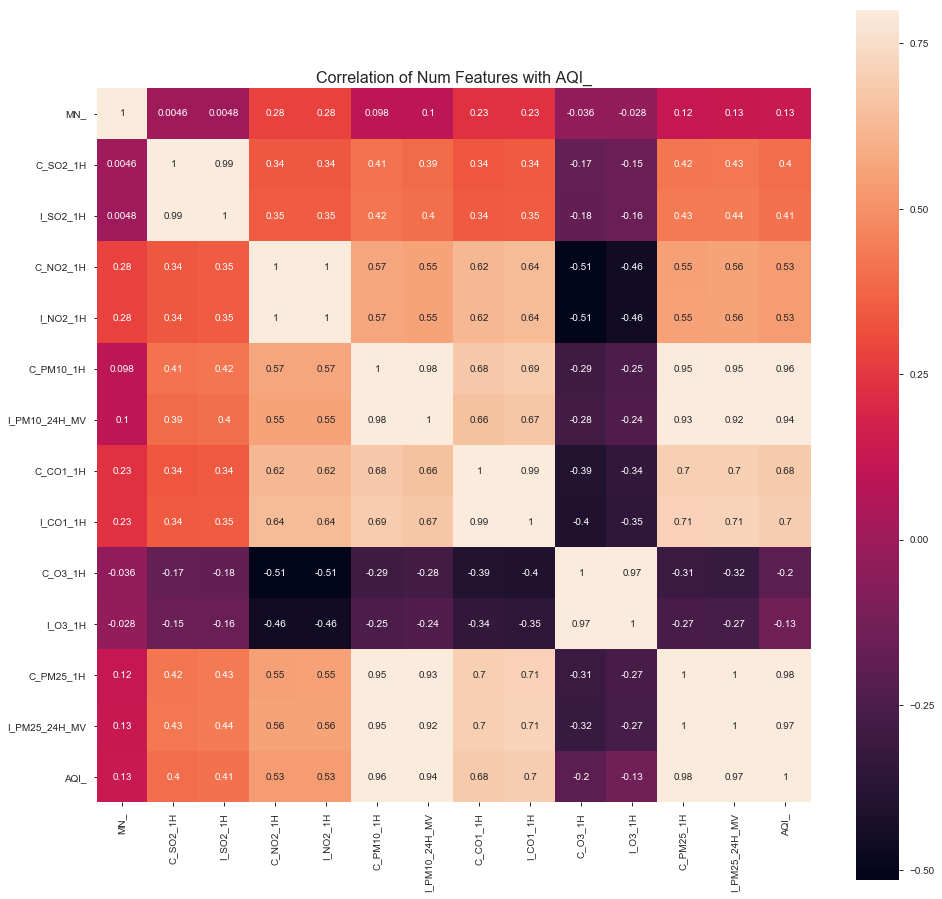

In [60]:
#相关性分析可视化
f , ax = plt.subplots(figsize = (16, 16))

plt.title('Correlation of Num Features with AQI_',y=1,size=16)

sns.heatmap(train_data[num_features].corr(),square = True,  vmax=0.8,annot=True)

In [61]:
num_features = [i for i in num_features if i not in ['AQI_']]

In [62]:
#查看数值型特征偏度与峰度
for i in num_features:
    print('{:15}'.format(i), 
          'Skewness: {:05.2f}'.format(train_data[i].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train_data[i].kurt())  
         )

MN_             Skewness: -0.03     Kurtosis: -00.29
C_SO2_1H        Skewness: 08.75     Kurtosis: 238.03
I_SO2_1H        Skewness: 05.94     Kurtosis: 110.03
C_NO2_1H        Skewness: 00.95     Kurtosis: 001.18
I_NO2_1H        Skewness: 00.94     Kurtosis: 001.12
C_PM10_1H       Skewness: 02.44     Kurtosis: 009.66
I_PM10_24H_MV   Skewness: 03.18     Kurtosis: 020.19
C_CO1_1H        Skewness: 04.21     Kurtosis: 128.40
I_CO1_1H        Skewness: 02.12     Kurtosis: 017.61
C_O3_1H         Skewness: 01.48     Kurtosis: 002.36
I_O3_1H         Skewness: 02.74     Kurtosis: 010.28
C_PM25_1H       Skewness: 02.18     Kurtosis: 006.78
I_PM25_24H_MV   Skewness: 01.86     Kurtosis: 004.46


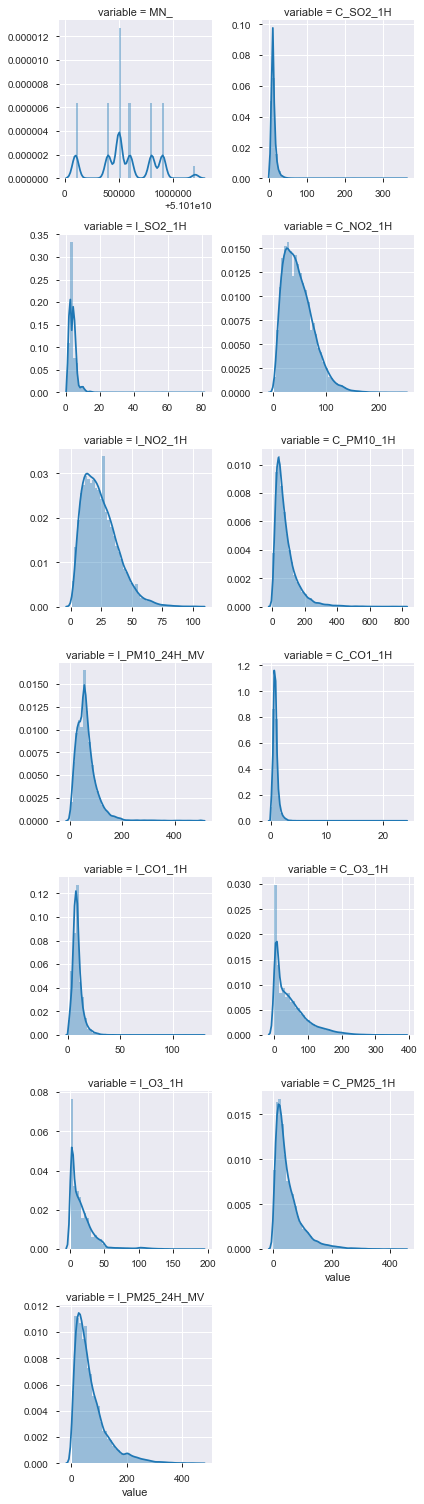

In [63]:
#每个数字特征的可视化
f=pd.melt(train_data,value_vars=num_features)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False)
g=g.map(sns.distplot,'value')

类别型特征

In [64]:
#unique分布
for fea in cate_features:
    print(train_data[fea].nunique())

13
6
6
6


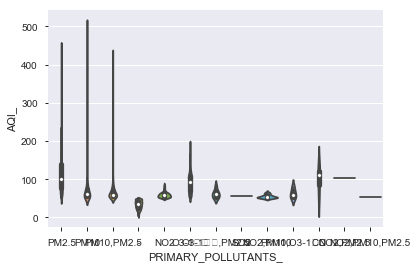

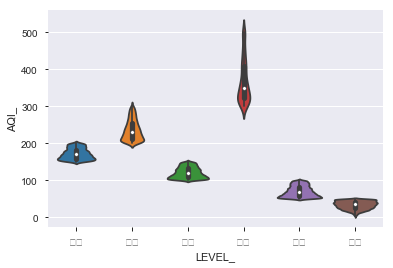

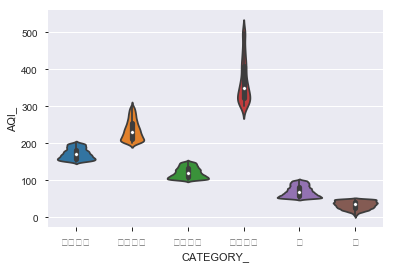

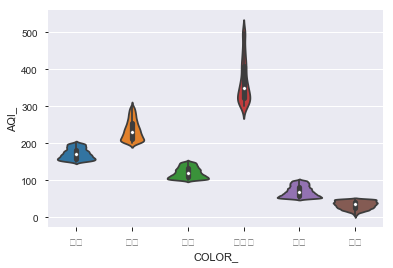

In [65]:
#类别特征的小提琴图可视化
catg_list = cate_features
target = 'AQI_'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=train_data)
    plt.show()

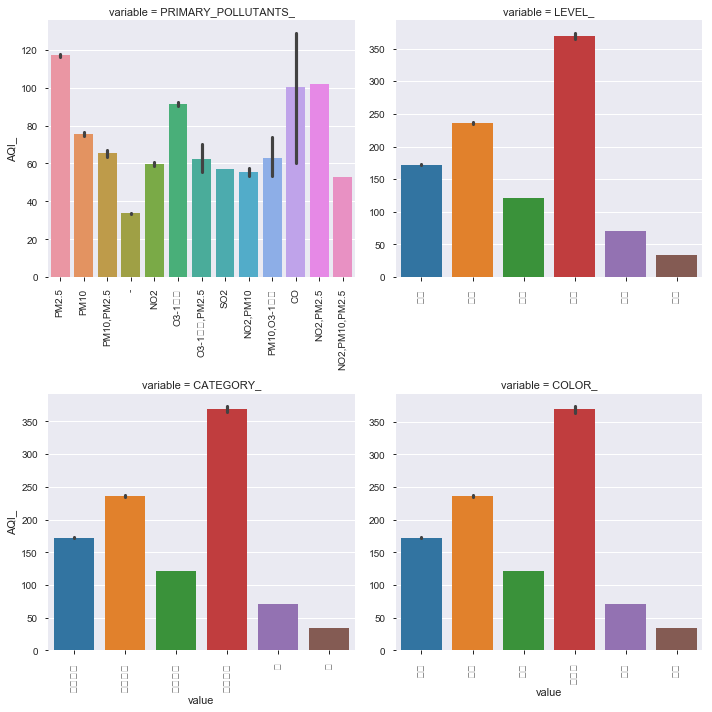

In [66]:
# 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train_data, id_vars=['AQI_'], value_vars=cate_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "AQI_")

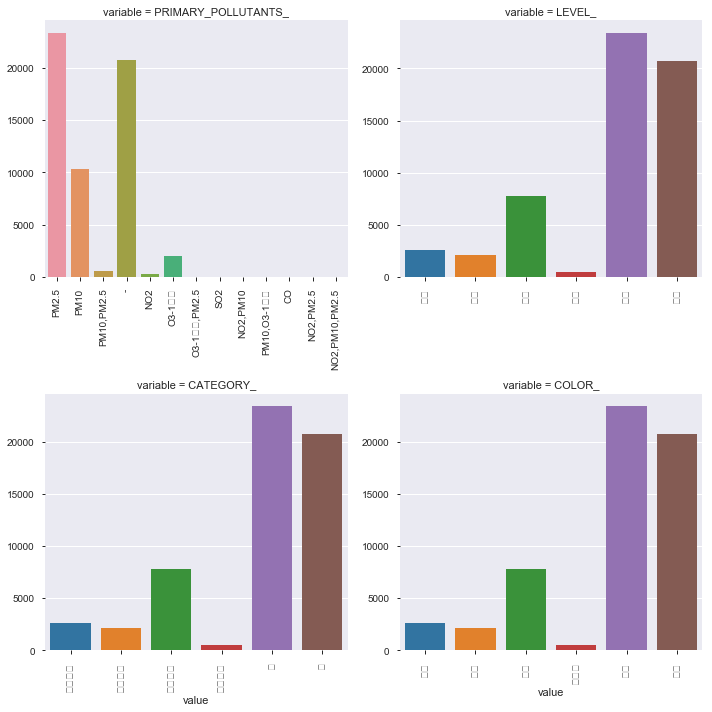

In [67]:
# 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(train_data,value_vars=cate_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")

In [68]:
train_data.head()

,MN_,DATA_TIME_,C_SO2_1H,I_SO2_1H,C_NO2_1H,I_NO2_1H,C_PM10_1H,I_PM10_24H_MV,C_CO1_1H,I_CO1_1H,C_O3_1H,I_O3_1H,C_PM25_1H,I_PM25_24H_MV,AQI_,PRIMARY_POLLUTANTS_,LEVEL_,CATEGORY_,COLOR_,UPDATE_TIME_
0,51010501002,2017/1/1 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/1/1 02:15:00
1,51010501002,2017/1/1 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/1/1 03:15:00
2,51010501002,2017/1/1 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/1/1 04:15:00
3,51010501002,2017/1/1 04:00:00,20.0,7.0,81.0,41.0,302.0,176.0,1.174,12.0,3.0,1.0,146.0,195.0,195.0,PM2.5,四级,中度污染,红色,2017/1/1 05:15:00
4,51010501002,2017/1/1 05:00:00,31.0,11.0,78.0,39.0,289.0,170.0,1.028,11.0,3.0,1.0,142.0,189.0,189.0,PM2.5,四级,中度污染,红色,2017/1/1 06:15:00


In [69]:
train_data.shape

(59974, 20)

删除异常值

In [70]:
# 异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

In [71]:
#剔除掉一些离群点
def quantile_clip(group):     
    group[group < group.quantile(.05)] = group.quantile(.05)
    group[group > group.quantile(.95)] = group.quantile(.95)
    return group

In [158]:
#对每个MN_,每小时进行执行
# df['AQI_'] = df.groupby(['MN_', 'DATA_TIME_'])['AQI_'].transform(quantile_clip)
# df.head(5)

In [72]:
num_features = [i for i in num_features if i not in ['MN_']]

In [73]:
train_data.DATA_TIME_.value_counts()

2017/11/12 14:00:00    8
2017/11/29 04:00:00    8
2017/12/4 07:00:00     8
2017/11/16 10:00:00    8
2017/11/7 05:00:00     8
                      ..
2017/12/11 14:00:00    6
2017/12/13 00:00:00    6
2017/12/11 02:00:00    6
2017/12/24 00:00:00    6
2017/12/18 05:00:00    5
Name: DATA_TIME_, Length: 8383, dtype: int64

特征构造

In [2]:
train_data = pd.read_csv('train_data.csv',index_col=0)

In [3]:
train_data.head()

,MN_,DATA_TIME_,C_SO2_1H,I_SO2_1H,C_NO2_1H,I_NO2_1H,C_PM10_1H,I_PM10_24H_MV,C_CO1_1H,I_CO1_1H,C_O3_1H,I_O3_1H,C_PM25_1H,I_PM25_24H_MV,AQI_,PRIMARY_POLLUTANTS_,LEVEL_,CATEGORY_,COLOR_,UPDATE_TIME_
0,51010501002,2017/1/1 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/1/1 02:15:00
1,51010501002,2017/1/1 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/1/1 03:15:00
2,51010501002,2017/1/1 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/1/1 04:15:00
3,51010501002,2017/1/1 04:00:00,20.0,7.0,81.0,41.0,302.0,176.0,1.174,12.0,3.0,1.0,146.0,195.0,195.0,PM2.5,四级,中度污染,红色,2017/1/1 05:15:00
4,51010501002,2017/1/1 05:00:00,31.0,11.0,78.0,39.0,289.0,170.0,1.028,11.0,3.0,1.0,142.0,189.0,189.0,PM2.5,四级,中度污染,红色,2017/1/1 06:15:00


In [4]:
train_data = train_data.loc[train_data['DATA_TIME_']!='2017/5/31 23:00:00']

In [5]:
#计算更新时间间隔
train_data['UPDATE_time']=(pd.to_datetime(train_data['UPDATE_TIME_'],format='%Y%m%d',errors='coerce')-\
                      pd.to_datetime(train_data['DATA_TIME_'],format='%Y%m%d',errors='coerce')).dt.days

In [6]:
date_range = pd.date_range('2017/1/1 01:00:00','2017/12/31 23:00:00',freq='1h')
date_range[:5]

DatetimeIndex(['2017-01-01 01:00:00', '2017-01-01 02:00:00',
               '2017-01-01 03:00:00', '2017-01-01 04:00:00',
               '2017-01-01 05:00:00'],
              dtype='datetime64[ns]', freq='H')

In [7]:
nex_date_range = pd.MultiIndex.from_product([train_data['MN_'].unique(),date_range],
                                           names = ['MN_','DATA_TIME_'])
new_df = pd.DataFrame(index = nex_date_range).reset_index()
new_df.head()

,MN_,DATA_TIME_
0,51010501002,2017-01-01 01:00:00
1,51010501002,2017-01-01 02:00:00
2,51010501002,2017-01-01 03:00:00
3,51010501002,2017-01-01 04:00:00
4,51010501002,2017-01-01 05:00:00


In [8]:
train_data['DATA_TIME_'] = train_data.DATA_TIME_.apply(lambda x:pd.to_datetime(x))
train_data['UPDATE_TIME_'] = train_data.UPDATE_TIME_.apply(lambda x:pd.to_datetime(x))

In [9]:
#合并new_df和train_data
df = pd.merge(new_df,train_data,on = ['MN_','DATA_TIME_'],how = 'left')

In [10]:
df.head().append(df.tail())

,MN_,DATA_TIME_,C_SO2_1H,I_SO2_1H,C_NO2_1H,I_NO2_1H,C_PM10_1H,I_PM10_24H_MV,C_CO1_1H,I_CO1_1H,...,I_O3_1H,C_PM25_1H,I_PM25_24H_MV,AQI_,PRIMARY_POLLUTANTS_,LEVEL_,CATEGORY_,COLOR_,UPDATE_TIME_,UPDATE_time
0,51010501002,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 02:15:00,NaN
1,51010501002,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 03:15:00,NaN
2,51010501002,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 04:15:00,NaN
3,51010501002,2017-01-01 04:00:00,20.0,7.0,81.0,41.0,302.0,176.0,1.174,12.0,...,1.0,146.0,195.0,195.0,PM2.5,四级,中度污染,红色,2017-01-01 05:15:00,NaN
4,51010501002,2017-01-01 05:00:00,31.0,11.0,78.0,39.0,289.0,170.0,1.028,11.0,...,1.0,142.0,189.0,189.0,PM2.5,四级,中度污染,红色,2017-01-01 06:15:00,NaN
70067,51010801001,2017-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
70068,51010801001,2017-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
70069,51010801001,2017-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
70070,51010801001,2017-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
70071,51010801001,2017-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [11]:
df['date'] = df['DATA_TIME_'].dt.strftime('%Y-%m-%d')

In [12]:
df.to_csv('df.csv')

In [65]:
df= pd.read_csv('df.csv',index_col=0)

In [71]:
df.columns

Index(['MN_', 'DATA_TIME_', 'C_SO2_1H', 'I_SO2_1H', 'C_NO2_1H', 'I_NO2_1H',
       'C_PM10_1H', 'I_PM10_24H_MV', 'C_CO1_1H', 'I_CO1_1H', 'C_O3_1H',
       'I_O3_1H', 'C_PM25_1H', 'I_PM25_24H_MV', 'AQI_', 'PRIMARY_POLLUTANTS_',
       'LEVEL_', 'CATEGORY_', 'COLOR_', 'UPDATE_TIME_', 'UPDATE_time', 'date'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70072 entries, 0 to 70071
Data columns (total 21 columns):
MN_                    70072 non-null int64
DATA_TIME_             70072 non-null datetime64[ns]
C_SO2_1H               54047 non-null float64
I_SO2_1H               54005 non-null float64
C_NO2_1H               56877 non-null float64
I_NO2_1H               56835 non-null float64
C_PM10_1H              56062 non-null float64
I_PM10_24H_MV          56020 non-null float64
C_CO1_1H               56920 non-null float64
I_CO1_1H               56878 non-null float64
C_O3_1H                52296 non-null float64
I_O3_1H                52254 non-null float64
C_PM25_1H              56635 non-null float64
I_PM25_24H_MV          56593 non-null float64
AQI_                   57209 non-null float64
PRIMARY_POLLUTANTS_    36499 non-null float64
LEVEL_                 57209 non-null float64
CATEGORY_              57209 non-null float64
COLOR_                 57209 non-null float64
UPDATE_TIME_

In [86]:
df.PRIMARY_POLLUTANTS_.unique()

array([nan, 'PM2.5', 'PM10', 'PM10,PM2.5', 'NO2', 'O3-1小时',
       'O3-1小时,PM2.5', 'SO2', 'NO2,PM10', 'PM10,O3-1小时', 'CO',
       'NO2,PM2.5', 'NO2,PM10,PM2.5'], dtype=object)

In [85]:
df.PRIMARY_POLLUTANTS_.replace('-',np.nan,inplace=True)

In [91]:
df.loc[df.PRIMARY_POLLUTANTS_=='PM2.5','PRIMARY_POLLUTANTS_']=1
df.loc[df.PRIMARY_POLLUTANTS_=='PM10','PRIMARY_POLLUTANTS_']=2
df.loc[df.PRIMARY_POLLUTANTS_=='PM10,PM2.5','PRIMARY_POLLUTANTS_']=3
df.loc[df.PRIMARY_POLLUTANTS_=='NO2','PRIMARY_POLLUTANTS_']=4
df.loc[df.PRIMARY_POLLUTANTS_=='O3-1小时','PRIMARY_POLLUTANTS_']=5
df.loc[df.PRIMARY_POLLUTANTS_=='O3-1小时,PM2.5','PRIMARY_POLLUTANTS_']=6
df.loc[df.PRIMARY_POLLUTANTS_=='SO2','PRIMARY_POLLUTANTS_']=7
df.loc[df.PRIMARY_POLLUTANTS_=='NO2,PM10','PRIMARY_POLLUTANTS_']=8
df.loc[df.PRIMARY_POLLUTANTS_=='PM10,O3-1小时','PRIMARY_POLLUTANTS_']=9
df.loc[df.PRIMARY_POLLUTANTS_=='CO','PRIMARY_POLLUTANTS_']=10
df.loc[df.PRIMARY_POLLUTANTS_=='NO2,PM2.5','PRIMARY_POLLUTANTS_']=11
df.loc[df.PRIMARY_POLLUTANTS_=='NO2,PM10,PM2.5','PRIMARY_POLLUTANTS_']=12
df.loc[df.PRIMARY_POLLUTANTS_==np.nan,'PRIMARY_POLLUTANTS_']=np.nan

In [76]:
df.loc[df.LEVEL_=='一级','LEVEL_']=1
df.loc[df.LEVEL_=='二级','LEVEL_']=2
df.loc[df.LEVEL_=='三级','LEVEL_']=3
df.loc[df.LEVEL_=='四级','LEVEL_']=4
df.loc[df.LEVEL_=='五级','LEVEL_']=5
df.loc[df.LEVEL_=='六级','LEVEL_']=6
df.loc[df.LEVEL_==np.nan,'LEVEL_']=np.nan

In [74]:
df.CATEGORY_.unique()

array([nan, '中度污染', '重度污染', '轻度污染', '严重污染', '良', '优'], dtype=object)

In [77]:
df.loc[df.CATEGORY_=='中度污染','CATEGORY_']=1
df.loc[df.CATEGORY_=='重度污染','CATEGORY_']=2
df.loc[df.CATEGORY_=='轻度污染','CATEGORY_']=3
df.loc[df.CATEGORY_=='严重污染','CATEGORY_']=4
df.loc[df.CATEGORY_=='良','CATEGORY_']=5
df.loc[df.CATEGORY_=='优','CATEGORY_']=6
df.loc[df.CATEGORY_==np.nan,'CATEGORY_']=np.nan

In [75]:
df.COLOR_.unique()

array([nan, '红色', '紫色', '橙色', '褐红色', '黄色', '绿色'], dtype=object)

In [78]:
df.loc[df.COLOR_=='红色','COLOR_']=1
df.loc[df.COLOR_=='紫色','COLOR_']=2
df.loc[df.COLOR_=='橙色','COLOR_']=3
df.loc[df.COLOR_=='褐红色','COLOR_']=4
df.loc[df.COLOR_=='黄色','COLOR_']=5
df.loc[df.COLOR_=='绿色','COLOR_']=6
df.loc[df.COLOR_==np.nan,'COLOR_']=np.nan

In [98]:
df['PRIMARY_POLLUTANTS_']=df.PRIMARY_POLLUTANTS_.apply(lambda x:float(x))
df['LEVEL_']=df.LEVEL_.apply(lambda x:float(x))
df['CATEGORY_']=df.CATEGORY_.apply(lambda x:float(x))
df['COLOR_']=df.COLOR_.apply(lambda x:float(x))

In [100]:
del df['UPDATE_time']

In [103]:
df['DATA_TIME_'] = df.DATA_TIME_.apply(lambda x:pd.to_datetime(x))
df['UPDATE_TIME_'] = df.UPDATE_TIME_.apply(lambda x:pd.to_datetime(x))
df['date'] = df.date.apply(lambda x:pd.to_datetime(x))

In [107]:
df.to_csv('df_number.csv')

补全时间序列

In [134]:
df = pd.read_csv('df_number.csv',index_col=0)

In [135]:
df['AQI_'] = np.log(df.AQI_+1)

In [136]:
df['AQI_1'] = df['AQI_']

In [137]:
df.head()

,MN_,DATA_TIME_,C_SO2_1H,I_SO2_1H,C_NO2_1H,I_NO2_1H,C_PM10_1H,I_PM10_24H_MV,C_CO1_1H,I_CO1_1H,...,C_PM25_1H,I_PM25_24H_MV,AQI_,PRIMARY_POLLUTANTS_,LEVEL_,CATEGORY_,COLOR_,UPDATE_TIME_,date,AQI_1
0,51010501002,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 02:15:00,2017-01-01 00:00:00,NaN
1,51010501002,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 03:15:00,2017-01-01 00:00:00,NaN
2,51010501002,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 04:15:00,2017-01-01 00:00:00,NaN
3,51010501002,2017-01-01 04:00:00,20.0,7.0,81.0,41.0,302.0,176.0,1.174,12.0,...,146.0,195.0,5.278115,1.0,4.0,1.0,1.0,2017-01-01 05:15:00,2017-01-01 00:00:00,5.278115
4,51010501002,2017-01-01 05:00:00,31.0,11.0,78.0,39.0,289.0,170.0,1.028,11.0,...,142.0,189.0,5.247024,1.0,4.0,1.0,1.0,2017-01-01 06:15:00,2017-01-01 00:00:00,5.247024


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70072 entries, 0 to 70071
Data columns (total 22 columns):
MN_                    70072 non-null int64
DATA_TIME_             70072 non-null object
C_SO2_1H               54047 non-null float64
I_SO2_1H               54005 non-null float64
C_NO2_1H               56877 non-null float64
I_NO2_1H               56835 non-null float64
C_PM10_1H              56062 non-null float64
I_PM10_24H_MV          56020 non-null float64
C_CO1_1H               56920 non-null float64
I_CO1_1H               56878 non-null float64
C_O3_1H                52296 non-null float64
I_O3_1H                52254 non-null float64
C_PM25_1H              56635 non-null float64
I_PM25_24H_MV          56593 non-null float64
AQI_                   57209 non-null float64
PRIMARY_POLLUTANTS_    36499 non-null float64
LEVEL_                 57209 non-null float64
CATEGORY_              57209 non-null float64
COLOR_                 57209 non-null float64
UPDATE_TIME_        

In [139]:
df['DATA_TIME_'] = df.DATA_TIME_.apply(lambda x:pd.to_datetime(x))
df['UPDATE_TIME_'] = df.UPDATE_TIME_.apply(lambda x:pd.to_datetime(x))
df['date'] = df.date.apply(lambda x:pd.to_datetime(x))

In [140]:
df['date_hour'] = df.DATA_TIME_.apply(lambda x:x.strftime('%Y-%m-%d-%H'))
df.head()

,MN_,DATA_TIME_,C_SO2_1H,I_SO2_1H,C_NO2_1H,I_NO2_1H,C_PM10_1H,I_PM10_24H_MV,C_CO1_1H,I_CO1_1H,...,I_PM25_24H_MV,AQI_,PRIMARY_POLLUTANTS_,LEVEL_,CATEGORY_,COLOR_,UPDATE_TIME_,date,AQI_1,date_hour
0,51010501002,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 02:15:00,2017-01-01,NaN,2017-01-01-01
1,51010501002,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 03:15:00,2017-01-01,NaN,2017-01-01-02
2,51010501002,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 04:15:00,2017-01-01,NaN,2017-01-01-03
3,51010501002,2017-01-01 04:00:00,20.0,7.0,81.0,41.0,302.0,176.0,1.174,12.0,...,195.0,5.278115,1.0,4.0,1.0,1.0,2017-01-01 05:15:00,2017-01-01,5.278115,2017-01-01-04
4,51010501002,2017-01-01 05:00:00,31.0,11.0,78.0,39.0,289.0,170.0,1.028,11.0,...,189.0,5.247024,1.0,4.0,1.0,1.0,2017-01-01 06:15:00,2017-01-01,5.247024,2017-01-01-05


In [141]:
df['date_day'] = df.DATA_TIME_.apply(lambda x:x.strftime('%Y-%m-%d'))

In [142]:
def date_trend(group):
    tmp = group.groupby('date_day').mean().reset_index()

    def nan_helper(y):
        return np.isnan(y), lambda z: z.nonzero()[0]

    y = tmp['AQI_'].values
    nans, x = nan_helper(y)

    regr = LinearRegression()
    regr.fit(x(~nans).reshape(-1, 1), y[~nans].reshape(-1, 1))
    tmp['date_trend'] = regr.predict(tmp.index.values.reshape(-1, 1)).ravel()
    group = pd.merge(group, tmp[['date_trend', 'date_day']], on='date_day', how='left')
    return group

In [143]:
df = df.groupby('MN_').apply(date_trend)
df.head()

MN_          DATA_TIME_  C_SO2_1H  I_SO2_1H  C_NO2_1H  \
MN_                                                                            
51010101001 0  51010101001 2017-01-01 01:00:00       NaN       NaN       NaN   
            1  51010101001 2017-01-01 02:00:00       NaN       NaN       NaN   
            2  51010101001 2017-01-01 03:00:00       NaN       NaN       NaN   
            3  51010101001 2017-01-01 04:00:00      22.0       8.0      82.0   
            4  51010101001 2017-01-01 05:00:00      19.0       7.0      48.0   

               I_NO2_1H  C_PM10_1H  I_PM10_24H_MV  C_CO1_1H  I_CO1_1H  ...  \
MN_                                                                    ...   
51010101001 0       NaN        NaN            NaN       NaN       NaN  ...   
            1       NaN        NaN            NaN       NaN       NaN  ...   
            2       NaN        NaN            NaN       NaN       NaN  ...   
            3      41.0      355.0          208.0     1.234      13.0  ...   
            4      24.0      283.0          167.0     0.868       9.0  ...   

               PRIMARY_POLLUTANTS_  LEVEL_  CATEGORY_  COLOR_  \
MN_                                                             
51010101001 0                  NaN     NaN        NaN     NaN   
            1                  NaN     NaN        NaN     NaN   
            2                  NaN     NaN        NaN     NaN   
            3                  1.0     5.0        2.0     2.0   
            4                  1.0     4.0        1.0     1.0   

                     UPDATE_TIME_       date     AQI_1      date_hour  \
MN_                                                                     
51010101001 0 2017-01-01 02:15:00 2017-01-01       NaN  2017-01-01-01   
            1 2017-01-01 03:15:00 2017-01-01       NaN  2017-01-01-02   
            2 2017-01-01 04:15:00 2017-01-01       NaN  2017-01-01-03   
            3 2017-01-01 05:15:00 2017-01-01  5.379897  2017-01-01-04   
            4 2017-01-01 06:15:00 2017-01-01  5.214936  2017-01-01-05   

                 date_day date_trend  
MN_                                   
51010101001 0  2017-01-01   4.049894  
            1  2017-01-01   4.049894  
            2  2017-01-01   4.049894  
            3  2017-01-01   4.049894  
            4  2017-01-01   4.049894  

[5 rows x 25 columns]

In [144]:
df = df.drop(['date_day', 'MN_'],axis=1)
df = df.reset_index()
df = df.drop('level_1',axis=1)
df['AQI_'] = df['AQI_'] - df['date_trend']
df.head()

,MN_,DATA_TIME_,C_SO2_1H,I_SO2_1H,C_NO2_1H,I_NO2_1H,C_PM10_1H,I_PM10_24H_MV,C_CO1_1H,I_CO1_1H,...,AQI_,PRIMARY_POLLUTANTS_,LEVEL_,CATEGORY_,COLOR_,UPDATE_TIME_,date,AQI_1,date_hour,date_trend
0,51010101001,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-01-01 02:15:00,2017-01-01,NaN,2017-01-01-01,4.049894
1,51010101001,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-01-01 03:15:00,2017-01-01,NaN,2017-01-01-02,4.049894
2,51010101001,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-01-01 04:15:00,2017-01-01,NaN,2017-01-01-03,4.049894
3,51010101001,2017-01-01 04:00:00,22.0,8.0,82.0,41.0,355.0,208.0,1.234,13.0,...,1.330003,1.0,5.0,2.0,2.0,2017-01-01 05:15:00,2017-01-01,5.379897,2017-01-01-04,4.049894
4,51010101001,2017-01-01 05:00:00,19.0,7.0,48.0,24.0,283.0,167.0,0.868,9.0,...,1.165042,1.0,4.0,1.0,1.0,2017-01-01 06:15:00,2017-01-01,5.214936,2017-01-01-05,4.049894


In [157]:
df['AQI_'].isnull().sum()

12863

In [148]:
temp = df.groupby('date_hour').mean().reset_index()

In [161]:
spl = UnivariateSpline(temp.index, temp['AQI_'].values, s=0.5)
spl(temp.index)

array([nan, nan, nan, ..., nan, nan, nan])

In [120]:
def hour_trend(group):
    tmp = group.groupby('date_hour').mean().reset_index()
    #s的值越小，对数据拟合越好，但是会过拟合的危险；
    spl = UnivariateSpline(tmp.index, tmp['AQI_1'].values, s=0.5)
    tmp['hour_trend'] = spl(tmp.index)
    group = pd.merge(group, tmp[['hour_trend', 'date_hour']], on='date_hour', how='left')

    return group

In [121]:
df = df.groupby('MN_').apply(hour_trend)

In [128]:
df.head()

,MN_,DATA_TIME_,C_SO2_1H,I_SO2_1H,C_NO2_1H,I_NO2_1H,C_PM10_1H,I_PM10_24H_MV,C_CO1_1H,I_CO1_1H,...,AQI_1,date_trend,hour_trend,hour,day,week_day,month,jidu,ri_huafen,week_day_fenlei
0,51010101001,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.049894,NaN,1,1,7,1,1.0,1.0,NaN
1,51010101001,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.049894,NaN,2,1,7,1,1.0,1.0,NaN
2,51010101001,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.049894,NaN,3,1,7,1,1.0,1.0,NaN
3,51010101001,2017-01-01 04:00:00,22.0,8.0,82.0,41.0,355.0,208.0,1.234,13.0,...,5.379897,4.049894,NaN,4,1,7,1,1.0,1.0,NaN
4,51010101001,2017-01-01 05:00:00,19.0,7.0,48.0,24.0,283.0,167.0,0.868,9.0,...,5.214936,4.049894,NaN,5,1,7,1,1.0,1.0,NaN


In [123]:
df = df.drop(['date_hour', 'MN_'], axis=1)
df = df.reset_index()
df = df.drop('level_1', axis=1)
df['AQI_'] = df['AQI_'] - df['hour_trend']

In [124]:
df['hour'] = df['DATA_TIME_'].dt.hour
df['day'] = df['DATA_TIME_'].dt.day
df['week_day'] = df['DATA_TIME_'].map(lambda x: x.weekday() + 1)
df['month'] = df['DATA_TIME_'].dt.month

In [125]:
#划分季度
df.loc[df.month.isin([1,2,3]),'jidu']=1
df.loc[df.month.isin([4,5,6]),'jidu']=2
df.loc[df.month.isin([7,8,9]),'jidu']=3
df.loc[df.month.isin([10,11,12]),'jidu']=4

In [126]:
#划分上旬中旬下旬
df.loc[df.day.isin([i for i in range(1,11)]),'ri_huafen']=1
df.loc[df.day.isin([i for i in range(11,21)]),'ri_huafen']=2
df.loc[df.day.isin([i for i in range(21,32)]),'ri_huafen']=3

In [127]:
#划分一周
df.loc[df.week_day.isin([i for i in range(1,4)]),'week_day_fenlei']=1
df.loc[df.week_day.isin([i for i in range(4,6)]),'week_day_fenlei']=2
df.loc[df.week_day.isin([i for i in range(6,7)]),'week_day_fenlei']=3

标准化

In [129]:
def std(group):
    group['AQI_std'] = np.std(group['AQI_'])
    return group

In [130]:
df = df.groupby('MN_').apply(std)
df['AQI_'] = df['AQI_'] / df['AQI_std']
df.head()

,MN_,DATA_TIME_,C_SO2_1H,I_SO2_1H,C_NO2_1H,I_NO2_1H,C_PM10_1H,I_PM10_24H_MV,C_CO1_1H,I_CO1_1H,...,date_trend,hour_trend,hour,day,week_day,month,jidu,ri_huafen,week_day_fenlei,AQI_std
0,51010101001,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.049894,NaN,1,1,7,1,1.0,1.0,NaN,NaN
1,51010101001,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.049894,NaN,2,1,7,1,1.0,1.0,NaN,NaN
2,51010101001,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.049894,NaN,3,1,7,1,1.0,1.0,NaN,NaN
3,51010101001,2017-01-01 04:00:00,22.0,8.0,82.0,41.0,355.0,208.0,1.234,13.0,...,4.049894,NaN,4,1,7,1,1.0,1.0,NaN,NaN
4,51010101001,2017-01-01 05:00:00,19.0,7.0,48.0,24.0,283.0,167.0,0.868,9.0,...,4.049894,NaN,5,1,7,1,1.0,1.0,NaN,NaN


缺失时间AQI预测

In [131]:
params = {
        'learning_rate': 0.2,
        'n_estimators': 30,
        'subsample': 0.8,
        'colsample_bytree': 0.6,
        'max_depth': 10,
        'min_child_weight': 1,
        'reg_alpha': 0,
        'gamma': 0
    }

In [132]:
df = pd.get_dummies(df, columns=cate_features)
df.head()

NameError: name 'cate_features' is not defined

In [ ]:
feature = df.columns.values.tolist()
train_feature = [x for x in feature if
                 x not in ['MN_', 'DATA_TIME_', 'AQI_', 'date', 'AQI_1', 'hour_trend',
                           'AQI_std', 'date_trend']]

train_df = df.loc[~df['AQI_'].isnull()]
test_df = df.loc[df['AQI_'].isnull()].copy()

print (train_feature)

In [ ]:
train_df.shape

In [ ]:
X = train_df[train_feature].values
y = train_df['AQI_'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

eval_set = [(X_test, y_test)]

In [ ]:
regressor = xgb.XGBRegressor(learning_rate=params['learning_rate'], n_estimators=params['n_estimators'],
                             booster='gbtree', objective='reg:linear', n_jobs=-1, subsample=params['subsample'],
                             colsample_bytree=params['colsample_bytree'], random_state=0,
                             max_depth=params['max_depth'], gamma=params['gamma'],
                             min_child_weight=params['min_child_weight'], reg_alpha=params['reg_alpha'])
regressor.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_set=eval_set)
print (test_df[train_feature].head())
print (test_df[train_feature].info())
test_df['predict'] = regressor.predict(test_df[train_feature].values)

In [ ]:
df = pd.merge(df, test_df[['MN_', 'DATA_TIME_', 'predict']], on=['MN_', 'DATA_TIME_'],
                  how='left')
feature_vis(regressor,train_feature)

还原预测结果

In [ ]:
df['imputation1'] = df['AQI_'].isnull()
df['AQI_'] = df['AQI_'].fillna(value=df['predict'])
df['AQI_'] = (df['AQI_'] * np.array(df['AQI_std']) + np.array(df['hour_trend'])
                     + np.array(df['date_trend']))

In [ ]:
print (df[['AQI_', 'predict', 'AQI_1']].describe())
df[['MN_', 'date', 'DATA_TIME_', 'AQI_', 'imputation1']].to_csv('com_training.csv', header=True,
                                                                                    index=None,
                                                                                    sep=';', mode='w')

In [ ]:
df = pd.read_csv('com_training.csv',index_col=0)

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

平移1格

In [ ]:
df1['DATA_TIME_'] = df1['DATA_TIME_'] + pd.DateOffset(hours=1*2)

In [ ]:
df1.head()

In [ ]:
df1 = df1.rename(columns={'AQI_': 'lagging' + str(5)})

In [ ]:
df2 = pd.merge(df, df1[['MN_', 'DATA_TIME_', 'lagging' + str(5)]], on=['MN_', 'DATA_TIME_'],how='left')

In [ ]:
df2.head(10)

In [ ]:
def create_lagging(df, df_original, i):
    df1 = df_original.copy()
    df1['DATA_TIME_'] = df1['DATA_TIME_'] + pd.DateOffset(minutes=i * 2)
    df1 = df1.rename(columns={'AQI_': 'lagging' + str(i)})
    df2 = pd.merge(df, df1[['MN_', 'DATA_TIME_', 'lagging' + str(i)]],
                   on=['MN_', 'DATA_TIME_'],
                   how='left')
    return df2

In [ ]:
df1 = create_lagging(df, df, 1)

构建时间序列特征

In [ ]:
lagging = 5
for i in range(2, lagging + 1):
    df1 = create_lagging(df1, df, i)

In [ ]:
df1.head(10)